# PCA



Principal Component Analysis (PCA) is a dimensionality reduction algorithm. 

In simplier terms, it is a method to make your data more compact, and therefore easier to work with.

Machine learning algorithms need data to learn, but an excess of data that doesn't add much value can drastically slow down the algorithm with no payout in better performance. 

PCA identifies which dimensions are most valuable by providing the percentage of variance explained for each dimension.

There is one major downside when using PCA. The returned principal compenents are linear combinations of your input features and thus are not interpretible.

## The Data

The data that we will work with is a dataset of stock fundamentals for 345 different stocks. 

There are 75 differents metrics, so our data is:

> 345 * 75 = **25,875 Observations**

After we perform PCA while maintaining 90% of the variance in the data, our dataset shrinks down to:

> 345 * 19 = **6,555 Observations**

The picture below shows the magnitude of this dimensionality reduction.

*Note: PCA shrinks the dataset in column count, not in row count. Therefore, the picture below only shows 20 rows of data, instead of the full 345.*

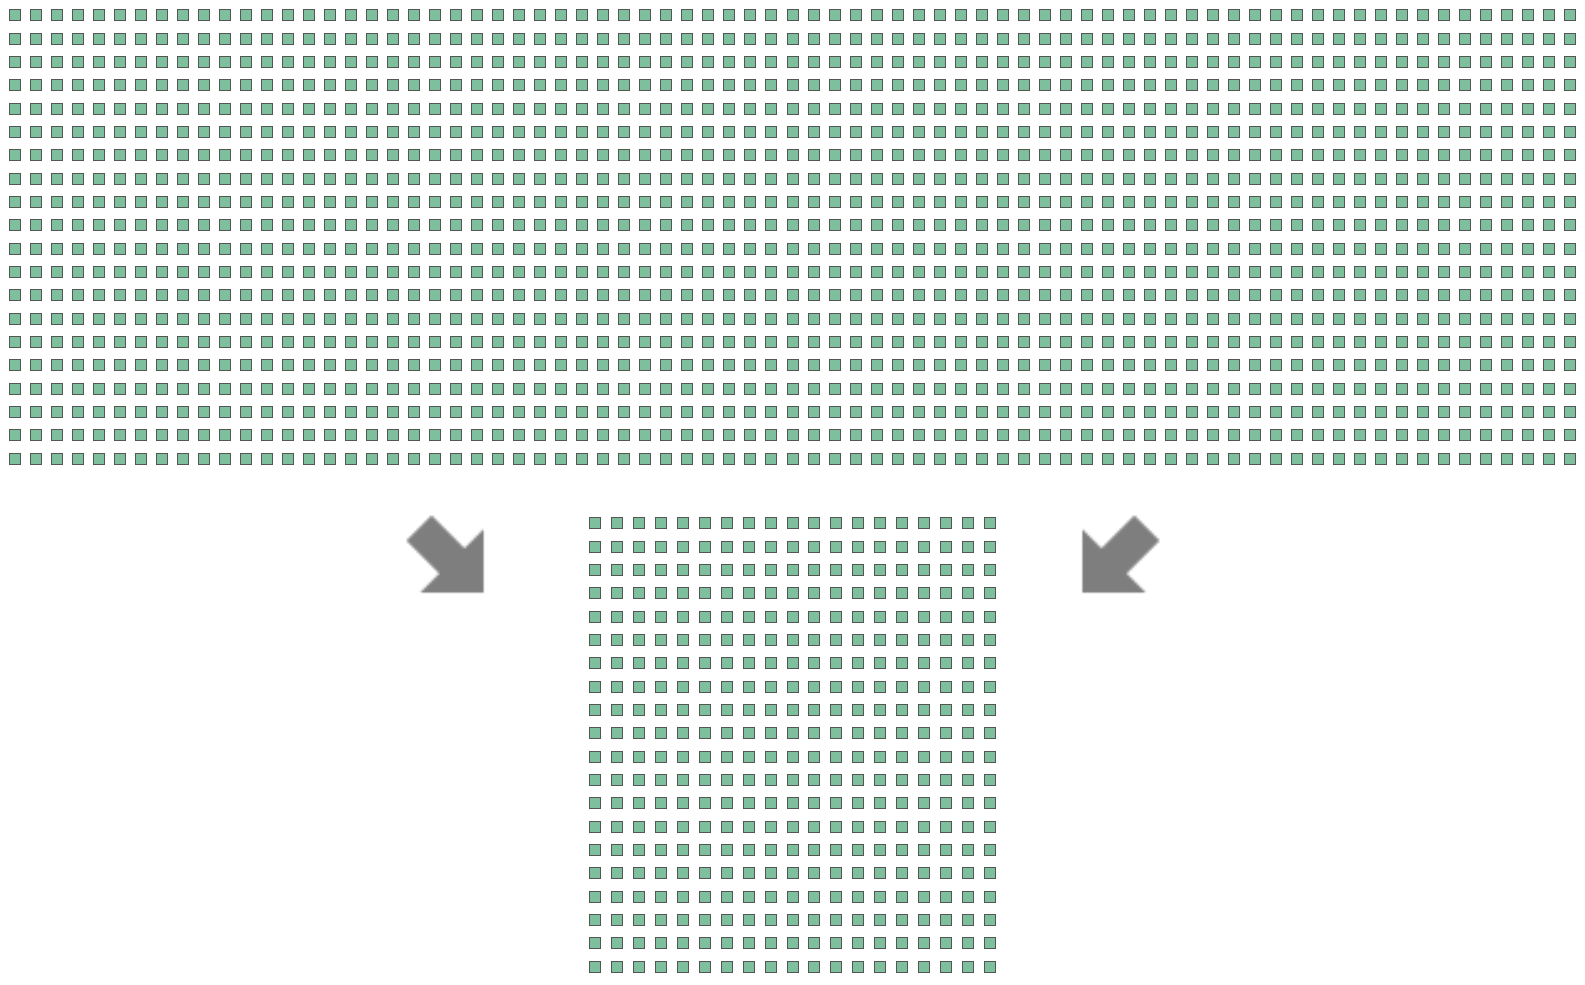

## Outline



1. Data Import

2. Implementation of PCA from Scratch

3. Scikit-Learn Implementation

## Import Necessary Packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Import Data

In order for the data to be ingested, it needs to have only numeric columns.

In [28]:
raw_df = pd.read_csv('stock_fundamentals_2014.csv')
raw_df = raw_df.iloc[:, 2:]

(345, 77)
(345, 75)


## Functions

In [5]:
def numpy_scale_transpose(user_data):
  np_data = user_data.to_numpy()

  scaler = StandardScaler()
  scaler.fit(np_data)
  scaled_data = (scaler.transform(np_data)).T

  return scaled_data

In [6]:
def create_var_covar_matrix(clean_data):
  var_covar_matrix = np.cov(clean_data)
  return var_covar_matrix

In [7]:
def find_eigen(var_covar_matrix):
  eigen_values, eigen_vectors = np.linalg.eig(var_covar_matrix)
  return(eigen_values, eigen_vectors)

In [8]:
def calculate_proportion_variance(eigen_values):
  proportion_of_variance = []
  for i in eigen_values:
    single_compenent = i / np.sum(eigen_values)
    proportion_of_variance.append(single_compenent)
  return(proportion_of_variance)

In [9]:
def matrix_mult_with_eigen_vectors(clean_data, eigen_vectors, num_rows_keep):
  return(np.matmul(clean_data.T, eigen_vectors[:,:num_rows_keep]))

## Execution

In [10]:
clean_data = numpy_scale_transpose(raw_df)

In [11]:
var_covar_matrix = create_var_covar_matrix(clean_data)

# sns.heatmap(np.round(var_covar_matrix, 2), annot=True, fmt='g')
# plt.show()

In [12]:
eigen_values, eigen_vectors = find_eigen(var_covar_matrix)

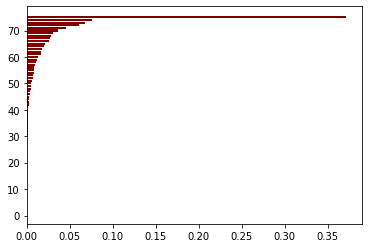

In [13]:
proportions = calculate_proportion_variance(eigen_values)

proportions.reverse()
plt.barh(range(1, len(proportions) + 1), proportions, color = 'maroon')
plt.show()
proportions.reverse()

In [14]:
principal_components = matrix_mult_with_eigen_vectors(clean_data, eigen_vectors, 3)
principal_components

array([[ -2.05677764,   1.66793227,   0.66986641],
       [  2.06924723,   1.10709599,  -0.1402293 ],
       [-34.12572966, -17.59637196,   0.76395298],
       ...,
       [  1.82414091,   0.99393869,  -0.38684164],
       [  2.19992253,  -1.51128435,  -0.09004199],
       [  2.45826724,  -0.60490207,  -0.0935831 ]])

## PCA with Scikit Learn

In [24]:
pca = PCA(n_components=0.90)
principalComponents = pca.fit_transform(clean_data.T)
# principalDf = pd.DataFrame(data = principalComponents
#              ,columns = ['Component 1', 'Component 2', 'Component #3'])

In [25]:
principalComponents

array([[ 2.05677764, -1.66793227, -0.66986641, ...,  1.0492591 ,
        -1.00989335, -1.05055204],
       [-2.06924723, -1.10709599,  0.1402293 , ...,  0.30012381,
        -0.62804808,  0.17078467],
       [34.12572966, 17.59637196, -0.76395298, ..., -0.29614871,
         2.29303251, -0.52140865],
       ...,
       [-1.82414091, -0.99393869,  0.38684164, ..., -0.03992839,
        -0.04308634,  0.09907216],
       [-2.19992253,  1.51128435,  0.09004199, ...,  0.03789402,
         0.25621546, -0.31723432],
       [-2.45826724,  0.60490207,  0.0935831 , ..., -0.46914642,
        -0.26177012, -0.15953509]])

In [26]:
pca.explained_variance_ratio_

array([0.37085125, 0.07615912, 0.06734814, 0.06052956, 0.0451673 ,
       0.03679051, 0.0308054 , 0.02865307, 0.02682401, 0.02524966,
       0.0207665 , 0.01939774, 0.01787259, 0.01681013, 0.01599958,
       0.01255435, 0.01140759, 0.0104747 , 0.00955502])